In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\usuario\Documents\12° SEMESTRE\TCC2\data\heart_2020_cleaned.csv')

In [3]:
df['ID'] = df.index

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,ID
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,2
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,3
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Análise Individul das Variáveis

### Heart Disease: Correspondentes que reportaram doença arterial coronariana ou infarto do miocárdio (TARGET)

In [6]:
round((df['HeartDisease'].value_counts()/ len(df['HeartDisease']))*100,1)

HeartDisease
No     91.4
Yes     8.6
Name: count, dtype: float64

In [23]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [24]:
dict = {'Yes':1,
        'No':0}
df['HeartDisease'] = df['HeartDisease'].map(dict)

### BMI: Equivalente ao IMC

In [7]:
#Levando em consideração que a base está trabalhando apenas com pacientes adultos, conversei com um amigo médico que 
#definiu que um IMC abaixo de 14 é muito baixo e acima de 60 pouco provável

In [9]:
def class_BMI(row):
    if row['BMI']<14:
        return "Resultado Estranho: Muito Baixo"
    elif row ['BMI']>=14 and row['BMI']<=18.49:
        return "Baixo Peso"
    elif row['BMI']>=18.5 and row['BMI']<=24.99:
        return "Normal"
    elif row['BMI']>=25 and row['BMI']<=29.99:
        return "SobrePeso"
    elif row['BMI']>=30 and row['BMI']<=34.99:
        return "Obesidade I"
    elif row['BMI']>=35 and row['BMI']<=39.99:
        return "Obesidade II"
    elif row['BMI']>=40 and row['BMI']<60:
        return "Obesidade III"
    elif row['BMI']>=60:
        return "Resultado Estranho: Muito Alto"
    else:
        return "ERRO"

In [10]:
df['Class_BMI'] = df.apply(class_BMI, axis=1)

In [11]:
df['Class_BMI'].value_counts()

Class_BMI
SobrePeso                          114512
Normal                              97331
Obesidade I                         61345
Obesidade II                        25112
Obesidade III                       15893
Baixo Peso                           4991
Resultado Estranho: Muito Alto        492
Resultado Estranho: Muito Baixo       119
Name: count, dtype: int64

In [12]:
df[df['Class_BMI'].str.contains('Resultado')]['HeartDisease'].value_counts()

HeartDisease
No     542
Yes     69
Name: count, dtype: int64

<Axes: >

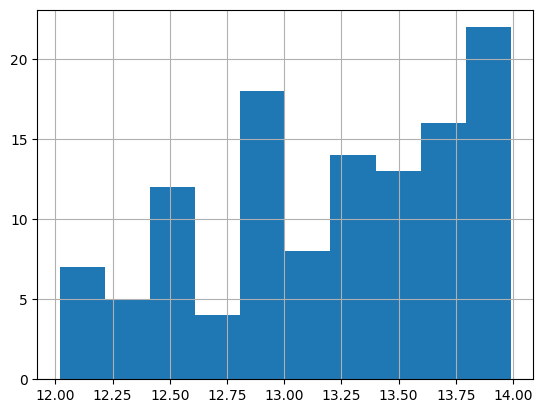

In [14]:
df[df['Class_BMI']=='Resultado Estranho: Muito Baixo']['BMI'].hist()

<Axes: >

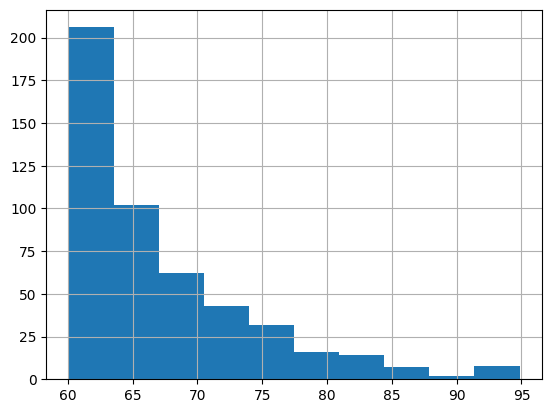

In [15]:
df[df['Class_BMI']=='Resultado Estranho: Muito Alto']['BMI'].hist()

### Smoking: Flag de identificação com fumantes, pelo menos 100 cigarros durante a vida

In [16]:
round((df['Smoking'].value_counts()/ len(df['Smoking']))*100,1)

Smoking
No     58.8
Yes    41.2
Name: count, dtype: float64

In [17]:
df['Smoking'].value_counts()

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

In [26]:
df['Smoking']= df['Smoking'].map(dict)

In [44]:
df[df['HeartDisease']==1]['Smoking'].value_counts()

Smoking
1    16037
0    11336
Name: count, dtype: int64

In [28]:
#58,6% dos que tiveram infarto fumavam

### AlcoholDrinking: Flag de identificação de consumo de bebida alcóolica, homens adultos que bebem mais de 14 drinks por semana ou mulheres que bebem mais que 7 drinks por semana.

In [29]:
round((df['AlcoholDrinking'].value_counts()/ len(df['AlcoholDrinking']))*100,1)

AlcoholDrinking
No     93.2
Yes     6.8
Name: count, dtype: float64

In [30]:
df['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

In [31]:
df['AlcoholDrinking']= df['AlcoholDrinking'].map(dict)

In [32]:
df[df['AlcoholDrinking']==1]['HeartDisease'].value_counts()

HeartDisease
0    20636
1     1141
Name: count, dtype: int64

### Stroke: Flag de identificação de pacientes que tiveram derrame cerebral

In [33]:
round((df['Stroke'].value_counts()/ len(df['Stroke']))*100,1)

Stroke
No     96.2
Yes     3.8
Name: count, dtype: float64

In [34]:
df['Stroke'].value_counts()

Stroke
No     307726
Yes     12069
Name: count, dtype: int64

In [35]:
df['Stroke']= df['Stroke'].map(dict)

In [36]:
df[df['Stroke']==1]['HeartDisease'].value_counts()

HeartDisease
0    7680
1    4389
Name: count, dtype: int64

### PhysicalHealth: Saúde Física, qtd de dias que pacientes tiveram problemas físicos no último mês

<Axes: >

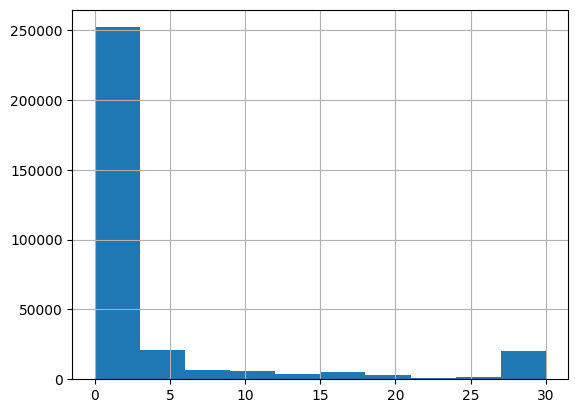

In [38]:
df['PhysicalHealth'].hist()

### MentalHealth: Saúde Mental, qtd de dias que pacientes tiveram problemas mentais no último mês

<Axes: >

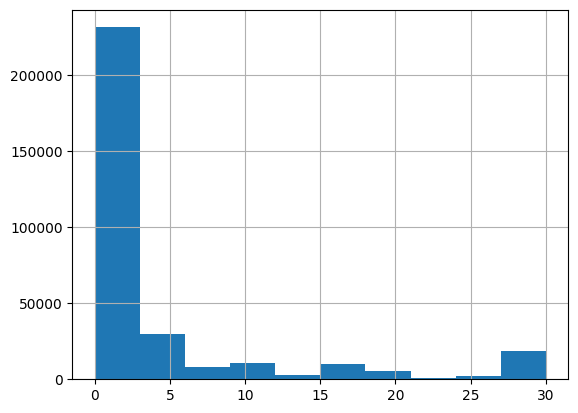

In [40]:
df['MentalHealth'].hist()

### DiffWalking: Flag de identificação de pacientes que possuem dificuldade de andar ou subir escadas

In [41]:
round((df['DiffWalking'].value_counts()/ len(df['DiffWalking']))*100,1)

DiffWalking
No     86.1
Yes    13.9
Name: count, dtype: float64

In [42]:
df['DiffWalking'].value_counts()

DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64

In [43]:
df['DiffWalking'] = df['DiffWalking'].map(dict)

In [45]:
df[df['HeartDisease']==1]['DiffWalking'].value_counts()

DiffWalking
0    17345
1    10028
Name: count, dtype: int64

### Sex: Gênero

In [46]:
round((df['Sex'].value_counts()/ len(df['Sex']))*100,1)

Sex
Female    52.5
Male      47.5
Name: count, dtype: float64

In [47]:
dict2 = {'Female':1,
         'Male':0}

df['Sex'] = df['Sex'].map(dict2)

In [48]:
df[df['HeartDisease']==1]['Sex'].value_counts()

Sex
0    16139
1    11234
Name: count, dtype: int64

In [49]:
#Mais da metade dos que tiveram infarto são do sexo Masculino

### AgeCategory: Faixa etária

In [50]:
round((df['AgeCategory'].value_counts()/ len(df['AgeCategory']))*100,1)

AgeCategory
65-69          10.7
60-64          10.5
70-74           9.7
55-59           9.3
50-54           7.9
80 or older     7.6
45-49           6.8
75-79           6.7
18-24           6.6
40-44           6.6
35-39           6.4
30-34           5.9
25-29           5.3
Name: count, dtype: float64

In [51]:
df[df['HeartDisease']==1]['AgeCategory'].value_counts()

AgeCategory
80 or older    5449
70-74          4847
65-69          4101
75-79          4049
60-64          3327
55-59          2202
50-54          1383
45-49           744
40-44           486
35-39           296
30-34           226
25-29           133
18-24           130
Name: count, dtype: int64

In [52]:
dict3 = {'18-24': 0,
         '25-29':1,
         '30-34':2,
         '35-39':3,
         '40-44':4,
         '45-49':5,
         '50-54':6,
         '55-59':7,
         '60-64':8,
         '65-69':9,
         '70-74':10,
         '75-79':11,
         '80 or older':12}

df['AgeCategory'] = df['AgeCategory'].map(dict3)

### Race: Etnia

In [53]:
round((df['Race'].value_counts()/ len(df['Race']))*100,1)

Race
White                             76.7
Hispanic                           8.6
Black                              7.2
Other                              3.4
Asian                              2.5
American Indian/Alaskan Native     1.6
Name: count, dtype: float64

In [54]:
df[df['HeartDisease']==1]['Race'].value_counts()

Race
White                             22507
Black                              1729
Hispanic                           1443
Other                               886
American Indian/Alaskan Native      542
Asian                               266
Name: count, dtype: int64

In [55]:
dict4 = {
   'White':0,
   'Hispanic':1,
   'Black':2,
   'Asian':3,
   'American Indian/Alaskan Native':4,
   'Other':5
}

df['Race'] = df['Race'].map(dict4)

### Diabetic: Identificação de pacientes com diabetes

In [56]:
round((df['Diabetic'].value_counts()/ len(df['Diabetic']))*100,1)

Diabetic
No                         84.3
Yes                        12.8
No, borderline diabetes     2.1
Yes (during pregnancy)      0.8
Name: count, dtype: float64

In [57]:
df[df['HeartDisease']==1]['Diabetic'].value_counts()

Diabetic
No                         17519
Yes                         8957
No, borderline diabetes      789
Yes (during pregnancy)       108
Name: count, dtype: int64

In [58]:
dict5 = {
    'No':0,
    'Yes':1,
    'No, borderline diabetes':2,
    'Yes (during pregnancy)':3
}

df['Diabetic'] = df['Diabetic'].map(dict5)

### PhysicalActivity: Identificação de pacientes que realizam atividade física

In [60]:
round((df['PhysicalActivity'].value_counts()/ len(df['PhysicalActivity']))*100,1)

PhysicalActivity
Yes    77.5
No     22.5
Name: count, dtype: float64

In [61]:
df[df['HeartDisease']==1]['PhysicalActivity'].value_counts()

PhysicalActivity
Yes    17489
No      9884
Name: count, dtype: int64

In [62]:
df['PhysicalActivity'] = df['PhysicalActivity'].map(dict)

### GenHealth: Saúde em geral

In [63]:
round((df['GenHealth'].value_counts()/ len(df['GenHealth']))*100,1)

GenHealth
Very good    35.6
Good         29.1
Excellent    20.9
Fair         10.8
Poor          3.5
Name: count, dtype: float64

In [66]:
df[df['HeartDisease']==1]['GenHealth'].value_counts()

GenHealth
2    9558
1    7084
3    5381
0    3850
4    1500
Name: count, dtype: int64

In [65]:
dict6 = {
    'Poor':0,
    'Fair':1,
    'Good':2,
    'Very good':3,
    'Excellent':4
}

df['GenHealth'] = df['GenHealth'].map(dict6)

### SleepTime: Média de quantas horas o paciente dorme por dia

<Axes: >

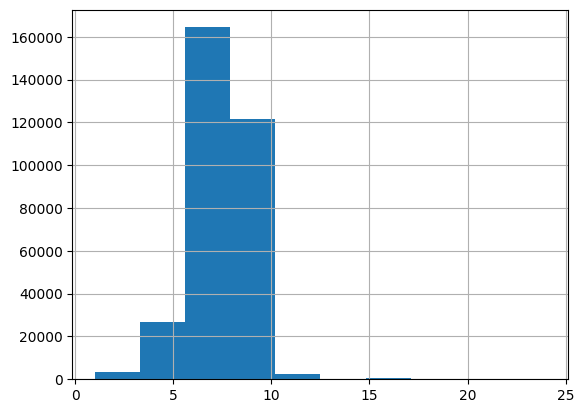

In [67]:
df['SleepTime'].hist()

In [68]:
df['SleepTime'].max()

24.0

In [70]:
df[df['SleepTime']>14]['HeartDisease'].value_counts()

HeartDisease
0    552
1    107
Name: count, dtype: int64

### Asthma: Flag de identificação de pacientes que possuem asma

In [71]:
round((df['Asthma'].value_counts()/ len(df['Asthma']))*100,1)

Asthma
No     86.6
Yes    13.4
Name: count, dtype: float64

In [72]:
df[df['HeartDisease']==1]['Asthma'].value_counts()

Asthma
No     22440
Yes     4933
Name: count, dtype: int64

In [73]:
df['Asthma'] = df['Asthma'].map(dict)

### KidneyDisease: Flag de identificação de pacientes que possuem doenças renais

In [74]:
round((df['KidneyDisease'].value_counts()/ len(df['KidneyDisease']))*100,1)

KidneyDisease
No     96.3
Yes     3.7
Name: count, dtype: float64

In [75]:
df['KidneyDisease'] = df['KidneyDisease'].map(dict)

### SkinCancer: Flag de identificação de pacientes com câncer de pele

In [76]:
round((df['SkinCancer'].value_counts()/ len(df['SkinCancer']))*100,1)

SkinCancer
No     90.7
Yes     9.3
Name: count, dtype: float64

In [77]:
df['SkinCancer'] = df['SkinCancer'].map(dict)

### Análises Estatísticas

<Axes: >

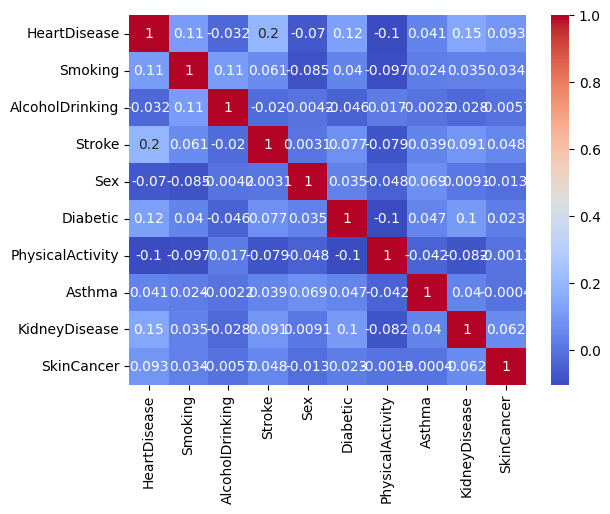

In [78]:
var_bin = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','Sex','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

corr_matrix = df[var_bin].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


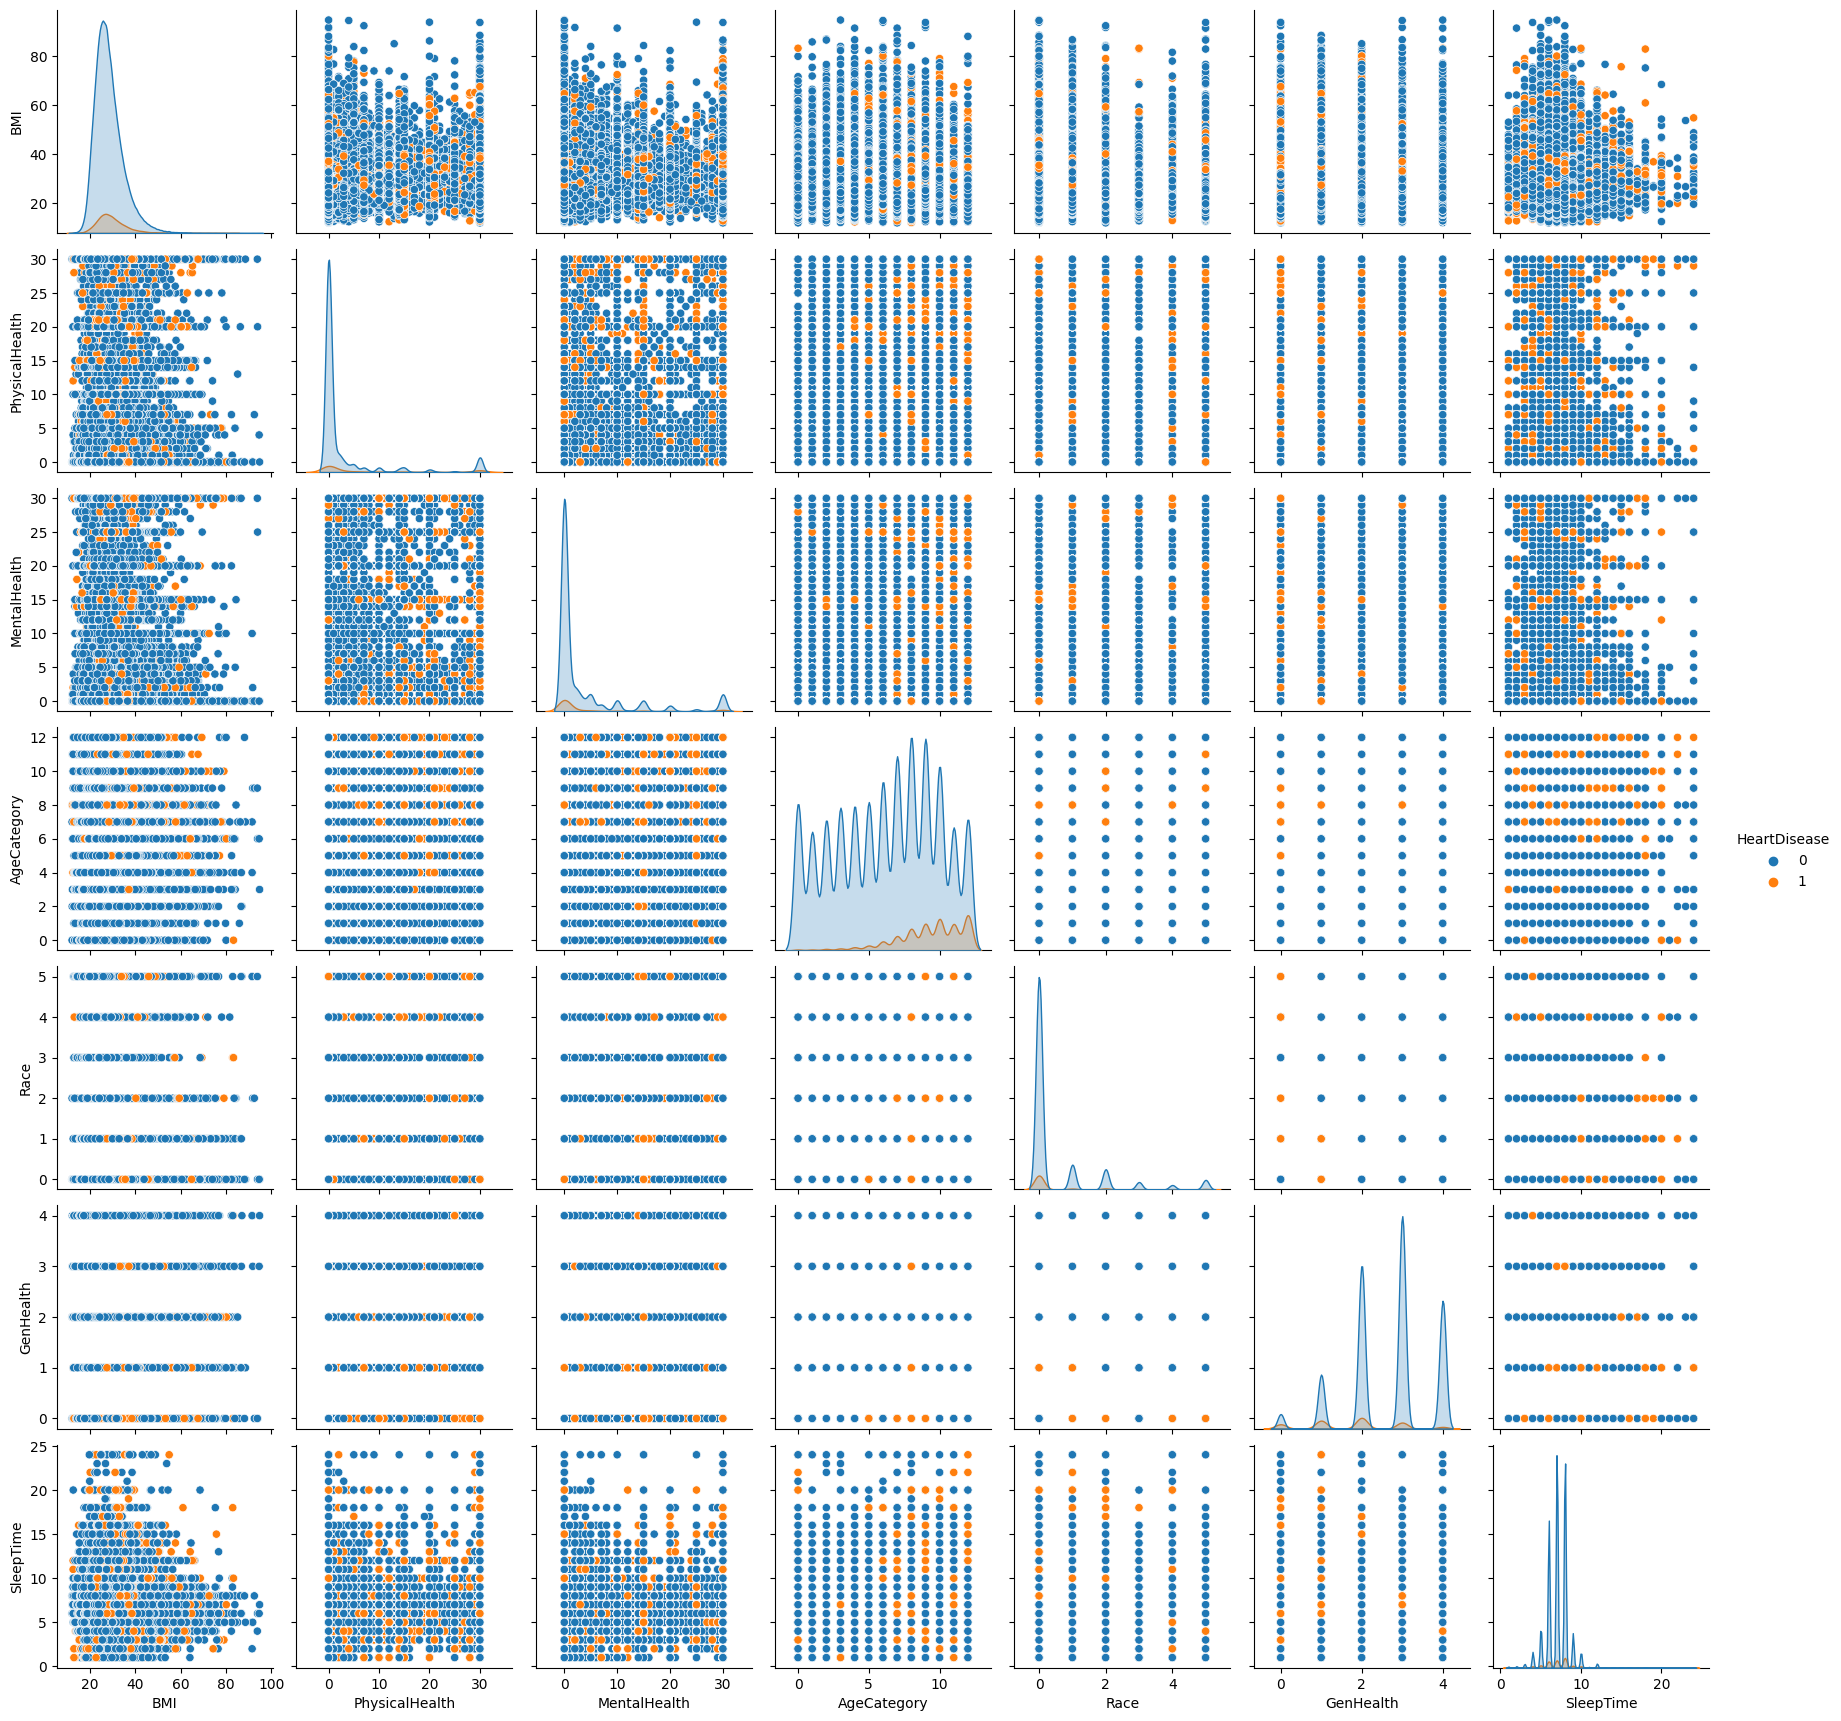

In [80]:
var_num = ['HeartDisease','BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','GenHealth','SleepTime']

new_df_test = df[var_num]

sns.pairplot(new_df_test,hue='HeartDisease')
plt.show()

In [ ]:
df.to_pickle(r'C:\Users\usuario\Documents\12° SEMESTRE\TCC2\data\data_pre_processed.pkl')